# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. Read Dataset

In [3]:
df = pd.read_csv('datasets/integrated_dataset.csv')
df.head()

Date   HomeTeam    AwayTeam  FTHG  FTAG  HS  AS  HST  AST  HF  AF  \
0  2012-08-18    arsenal  sunderland     0     0  14   3    4    2  12   8   
1  2012-08-18     fulham     norwich     5     0  11   4    9    2  12  11   
2  2012-08-18  newcastle   tottenham     2     1   6  12    4    6  12   8   
3  2012-08-18        qpr     swansea     0     5  20  12   11    8  11  14   
4  2012-08-18    reading       stoke     1     1   9   6    3    3   9  14   

   HC  AC  HY  AY  HR  AR  B365H  B365D  B365A Result  HPoss  HDays  ADays  \
0   7   0   0   0   0   0   1.40   4.50   8.50      D    NaN     10     10   
1   6   3   0   0   0   0   1.80   3.60   4.50      W    NaN     10     10   
2   3   5   2   2   0   0   2.50   3.40   2.75      W    NaN     10     10   
3   5   3   2   2   0   0   2.00   3.40   3.80      L    NaN     10     10   
4   4   3   2   4   0   1   2.38   3.25   3.10      D    NaN     10     10   

   HxG  AxG  
0  NaN  NaN  
1  NaN  NaN  
2  NaN  NaN  
3  NaN  NaN  
4  NaN  NaN

In [4]:
df.shape

(3800, 26)

# 3. Exploratory Data Analysis

## 3.1 Dataset Overview

Firstly, we will try to gain an overview of the dataset that we will be working with.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3800 non-null   object 
 1   HomeTeam  3800 non-null   object 
 2   AwayTeam  3800 non-null   object 
 3   FTHG      3800 non-null   int64  
 4   FTAG      3800 non-null   int64  
 5   HS        3800 non-null   int64  
 6   AS        3800 non-null   int64  
 7   HST       3800 non-null   int64  
 8   AST       3800 non-null   int64  
 9   HF        3800 non-null   int64  
 10  AF        3800 non-null   int64  
 11  HC        3800 non-null   int64  
 12  AC        3800 non-null   int64  
 13  HY        3800 non-null   int64  
 14  AY        3800 non-null   int64  
 15  HR        3800 non-null   int64  
 16  AR        3800 non-null   int64  
 17  B365H     3800 non-null   float64
 18  B365D     3800 non-null   float64
 19  B365A     3800 non-null   float64
 20  Result    3800 non-null   obje

From the output above, we can see that each variable seems to have suitable data type. We can also see that the column HPoss has 760 null values, while both the columns HxG and AxG has 1900 null values. This already tells us that these three columns are not suitable to be used as features.

In [6]:
df = df.drop(['HPoss', 'HxG', 'AxG'], axis=1)

## 3.2 Descriptive Measures of Data

For each numerical column, we will try to gain an intuition regarding the descriptive measures of it.

In [7]:
df.describe()

FTHG         FTAG           HS           AS          HST  \
count  3800.000000  3800.000000  3800.000000  3800.000000  3800.000000   
mean      1.517632     1.218947    13.976579    11.357895     5.034737   
std       1.307320     1.189123     5.638652     4.880765     2.933294   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000    10.000000     8.000000     3.000000   
50%       1.000000     1.000000    13.000000    11.000000     5.000000   
75%       2.000000     2.000000    17.000000    14.000000     7.000000   
max       9.000000     9.000000    43.000000    31.000000    20.000000   

               AST           HF           AF           HC           AC  \
count  3800.000000  3800.000000  3800.000000  3800.000000  3800.000000   
mean      4.150000    10.524474    10.876053     5.845789     4.727105   
std       2.522471     3.394238     3.562055     3.097249     2.699771   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       2.000000     8.000000     8.000000     4.000000     3.000000   
50%       4.000000    10.000000    11.000000     5.000000     4.000000   
75%       6.000000    13.000000    13.000000     8.000000     6.000000   
max      20.000000    24.000000    26.000000    19.000000    17.000000   

                HY           AY           HR           AR        B365H  \
count  3800.000000  3800.000000  3800.000000  3800.000000  3800.000000   
mean      1.527368     1.723684     0.055000     0.075526     2.925095   
std       1.213154     1.255875     0.237066     0.274053     2.168801   
min       0.000000     0.000000     0.000000     0.000000     1.060000   
25%       1.000000     1.000000     0.000000     0.000000     1.660000   
50%       1.000000     2.000000     0.000000     0.000000     2.250000   
75%       2.000000     3.000000     0.000000     0.000000     3.250000   
max       7.000000     9.000000     2.000000     2.000000    23.000000   

             B365D        B365A        HDays        ADays  
count  3800.000000  3800.000000  3800.000000  3800.000000  
mean      4.198047     4.904376     6.019211     6.056579  
std       1.353576     4.298677     2.436646     2.428273  
min       2.800000     1.120000     2.000000     2.000000  
25%       3.400000     2.300000     4.000000     4.000000  
50%       3.700000     3.400000     6.000000     6.000000  
75%       4.347500     5.500000     7.000000     8.000000  
max      17.000000    41.000000    10.000000    10.000000

From the table, it is easy to see that the home team tends to perform better than the away team during a match for the most part.

In [8]:
# use boxplots to visualize outliers
# sns.boxplot(x='price',y='num_of_doors',data=auto)

## 3.3 Visualize Correlations

In football, the higher the goals you score in a match, the higher the chance you have of winning the match. In this section, we are interested in identifying the variables that are most influential in determining the number of goals scored. Specifically, we will ask ourselves these two questions:

- **Which Home-Team-related-variables correlates most to FTHG?**

- **Which Away-Team-related-variables correlates most to ATHG?**

In [9]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D',
       'B365A', 'Result', 'HDays', 'ADays'],
      dtype='object')

In [10]:
ht_df = df[['Date', 'HomeTeam', 'FTHG', 'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'HDays']]
at_df = df[['Date', 'AwayTeam', 'FTAG', 'AS', 'AST', 'AF', 'AC', 'AY', 'AR', 'ADays']]

C:\Users\choibs\AppData\Local\Temp\ipykernel_7540\334724198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ht_df.corr('spearman'),cbar=True,annot=True)


<AxesSubplot:>

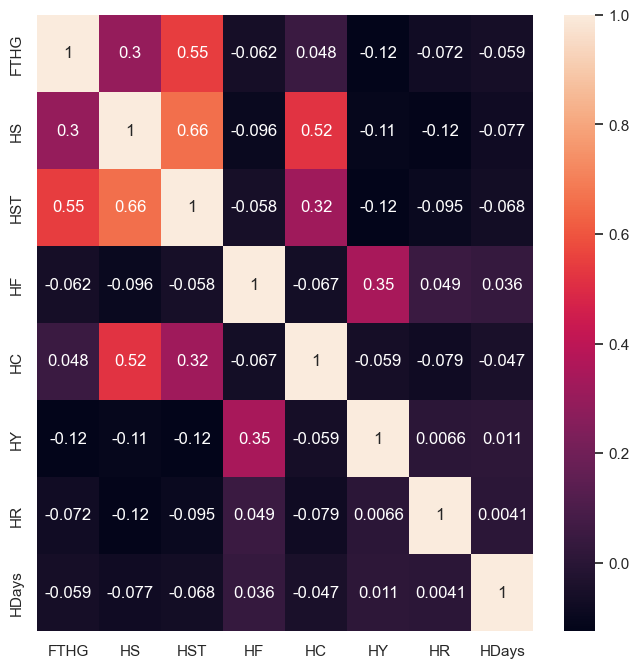

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(ht_df.corr('spearman'),cbar=True,annot=True)

**Which Home-Team-related-variables correlates most to FTHG (Goals Scored by Home Team) ?**

Both the HS (Number of Shots for Home Team) and HST (Number of Shots on Target for Home Team) have relatively high correlation to FTHG. This suggests that HS and HST can be a useful predictor for the outcome of a football match.

C:\Users\choibs\AppData\Local\Temp\ipykernel_7540\1793671813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(at_df.corr('spearman'),cbar=True,annot=True)


<AxesSubplot:>

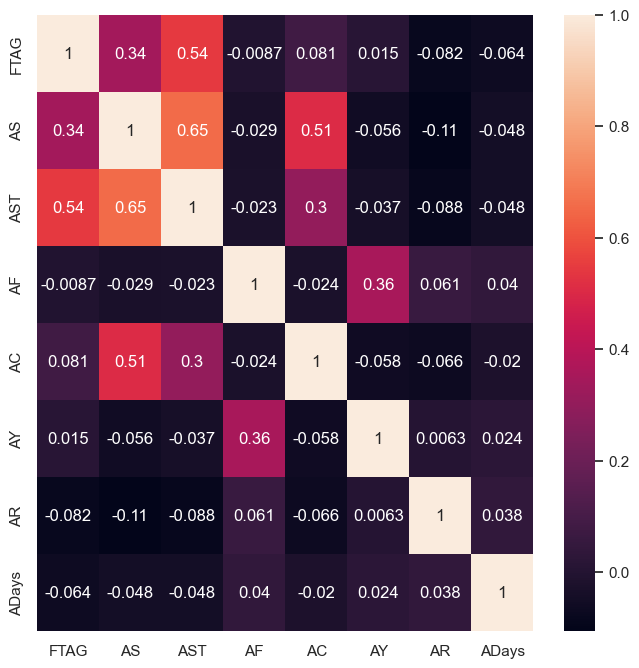

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(at_df.corr('spearman'),cbar=True,annot=True)

**Which Away-Team-related-variables correlates most to ATHG?**

Both the AS (Number of Shots for Away Team) and AST (Number of Shots on Target for Away Team) have relatively high correlation to FTAG. This suggests that AS and AST can be a useful predictor for the outcome of a football match.

## 3.4 Relationships between Variables

### 3.4.1 How does the number of shots affect the outcome of the match?

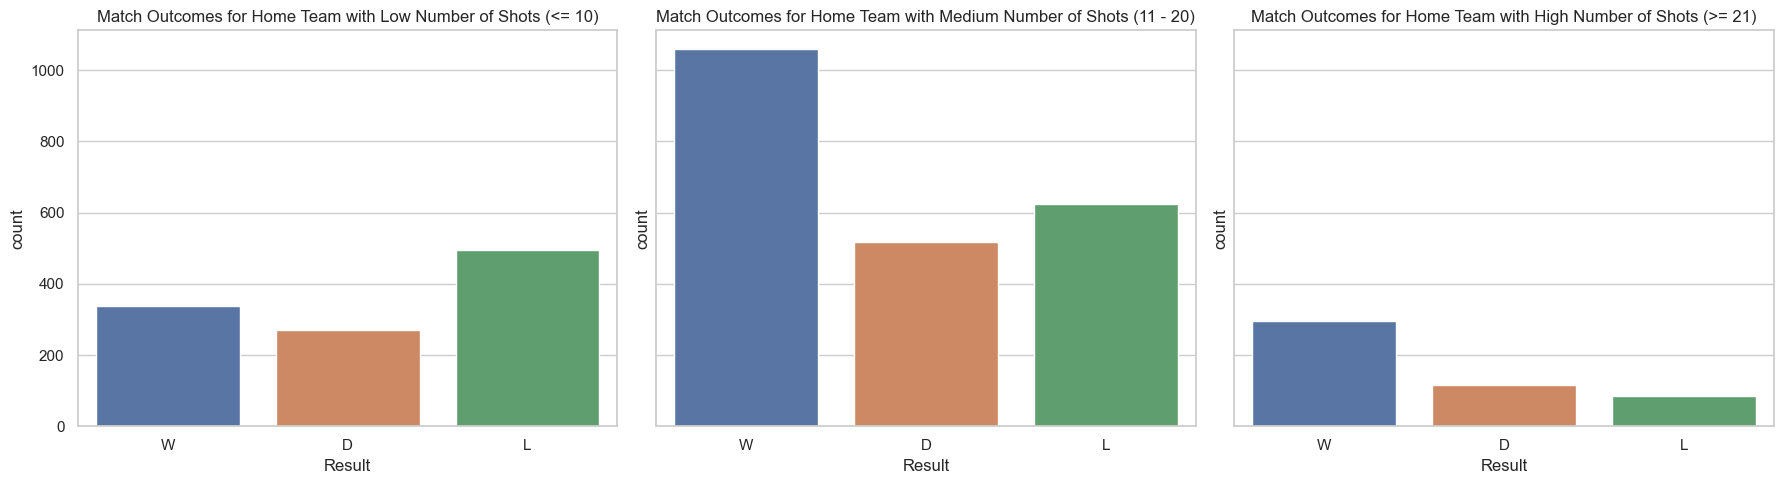

In [13]:
lowAmountOfShots_df = df[(df['HS'] <= 10)]
mediumAmountOfShots_df = df[(df['HS'] >= 11) & (df['HS'] <= 20)]
highAmountOfShots_df = df[(df['HS'] >= 21)]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[0].set_title('Match Outcomes for Home Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[1].set_title('Match Outcomes for Home Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[2].set_title('Match Outcomes for Home Team with High Number of Shots (>= 21)')

plt.tight_layout()

C:\Users\choibs\AppData\Local\Temp\ipykernel_7540\711522923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_7540\711522923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_7540\711522923.py:7: SettingW

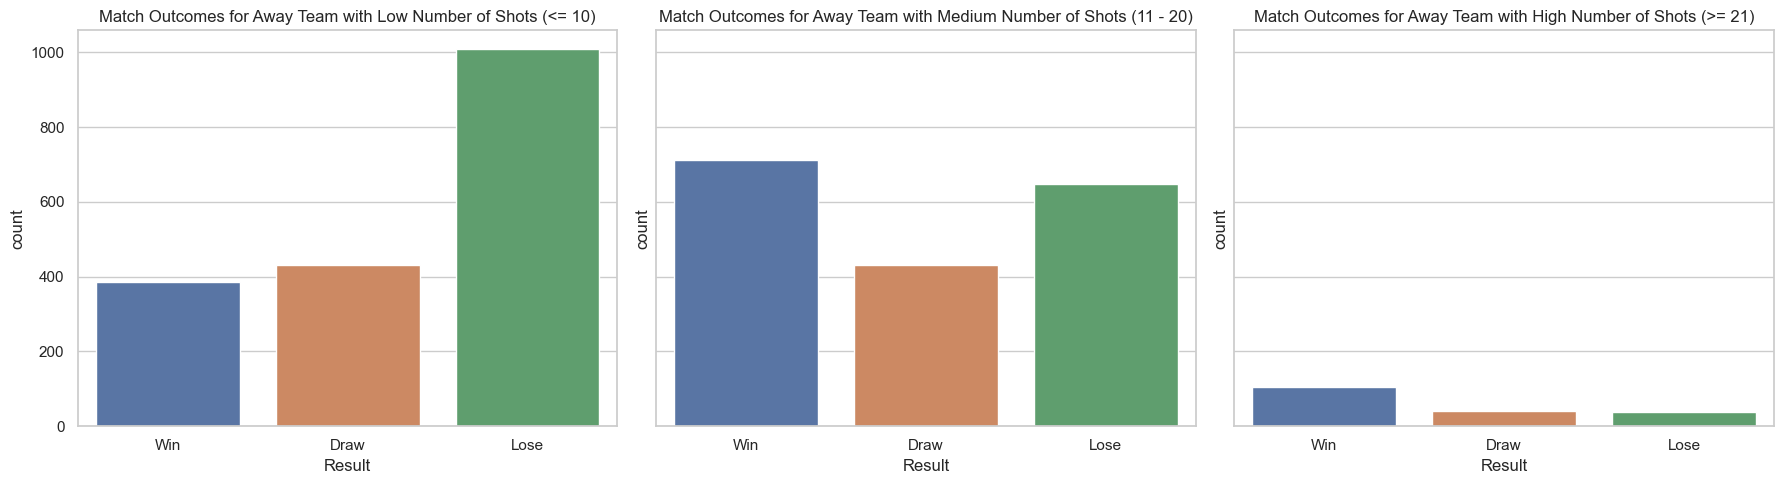

In [14]:
lowAmountOfShots_df = df[(df['AS'] <= 10)]
mediumAmountOfShots_df = df[(df['AS'] >= 11) & (df['AS'] <= 20)]
highAmountOfShots_df = df[(df['AS'] >= 21)]

lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
highAmountOfShots_df['Result'] = highAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[0].set_title('Match Outcomes for Away Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[1].set_title('Match Outcomes for Away Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[2].set_title('Match Outcomes for Away Team with High Number of Shots (>= 21)')

plt.tight_layout()

Compare percentages of win% in first plot and last plot. Describe how you do binning.

### 3.4.2 How does the number of shots on target affect the outcome of the match?

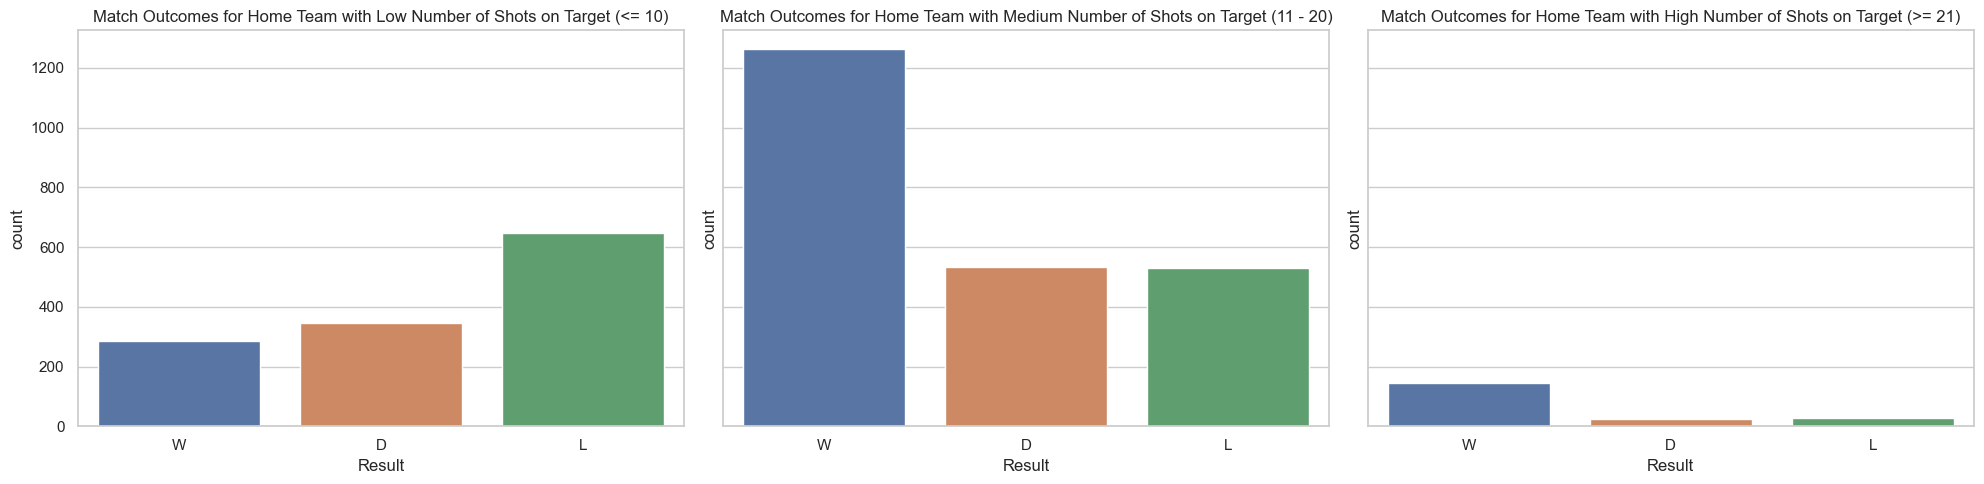

In [15]:
lowAmountOfShots_df = df[(df['HST'] <= 3)]
mediumAmountOfShots_df = df[(df['HST'] >= 4) & (df['HST'] <= 10)]
highAmountOfShots_df = df[(df['HST'] >= 11)]

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[0].set_title('Match Outcomes for Home Team with Low Number of Shots on Target (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[1].set_title('Match Outcomes for Home Team with Medium Number of Shots on Target (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['W', 'D', 'L'])
axes[2].set_title('Match Outcomes for Home Team with High Number of Shots on Target (>= 21)')

plt.tight_layout()

C:\Users\choibs\AppData\Local\Temp\ipykernel_7540\2075144645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_7540\2075144645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
C:\Users\choibs\AppData\Local\Temp\ipykernel_7540\2075144645.py:7: Setti

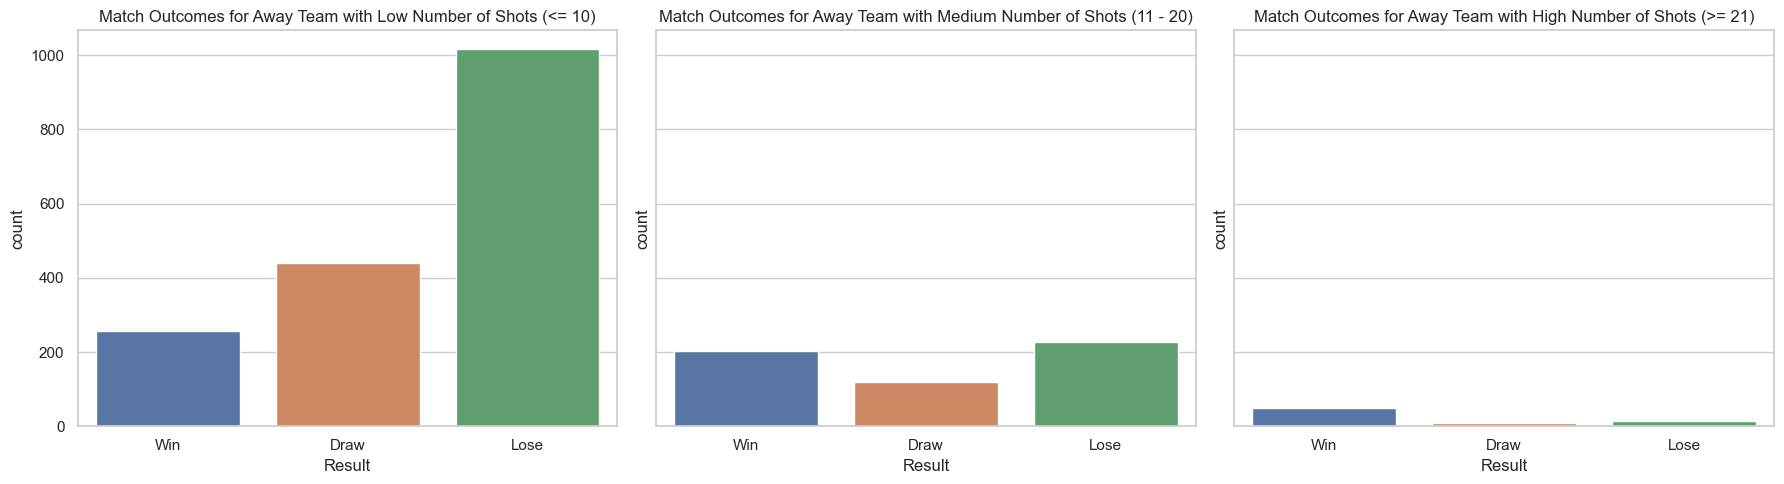

In [16]:
lowAmountOfShots_df = df[(df['AST'] <= 3)]
mediumAmountOfShots_df = df[(df['AST'] >= 4) & (df['AS'] <= 10)]
highAmountOfShots_df = df[(df['AST'] >= 11)]

lowAmountOfShots_df['Result'] = lowAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
mediumAmountOfShots_df['Result'] = mediumAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})
highAmountOfShots_df['Result'] = highAmountOfShots_df['Result'].map({'W': 'Lose', 'L':'Win', 'D':'Draw'})

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# fig.suptitle('Initial Pokemon - 1st Generation')

# Win
sns.countplot(ax=axes[0], data=lowAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[0].set_title('Match Outcomes for Away Team with Low Number of Shots (<= 10)')

# Draw
sns.countplot(ax=axes[1], data=mediumAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[1].set_title('Match Outcomes for Away Team with Medium Number of Shots (11 - 20)')

# Lose
sns.countplot(ax=axes[2], data=highAmountOfShots_df, x='Result', order=['Win', 'Draw', 'Lose'])
axes[2].set_title('Match Outcomes for Away Team with High Number of Shots (>= 21)')

plt.tight_layout()

Compare percentages of win% in first plot and last plot. Describe how you do binning.

### 3.4.3 What is the relationship between betting odds and the match outcome?

In [17]:
df.head()

Date   HomeTeam    AwayTeam  FTHG  FTAG  HS  AS  HST  AST  HF  AF  \
0  2012-08-18    arsenal  sunderland     0     0  14   3    4    2  12   8   
1  2012-08-18     fulham     norwich     5     0  11   4    9    2  12  11   
2  2012-08-18  newcastle   tottenham     2     1   6  12    4    6  12   8   
3  2012-08-18        qpr     swansea     0     5  20  12   11    8  11  14   
4  2012-08-18    reading       stoke     1     1   9   6    3    3   9  14   

   HC  AC  HY  AY  HR  AR  B365H  B365D  B365A Result  HDays  ADays  
0   7   0   0   0   0   0   1.40   4.50   8.50      D     10     10  
1   6   3   0   0   0   0   1.80   3.60   4.50      W     10     10  
2   3   5   2   2   0   0   2.50   3.40   2.75      W     10     10  
3   5   3   2   2   0   0   2.00   3.40   3.80      L     10     10  
4   4   3   2   4   0   1   2.38   3.25   3.10      D     10     10

In [18]:
def getB365Pred(row):
    cols = ['B365H', 'B365D', 'B365A']
    
    lowest = 'B365H'
    for c in cols:
        if row[c] < row[lowest]:
            lowest = c
    
    if lowest[-1] == 'H':
        return 'W'
    elif lowest[-1] == 'A':
        return 'L'
    else:
        return 'D'

df['B365 Prediction'] = df.apply(getB365Pred, axis=1)
df.head()

Date   HomeTeam    AwayTeam  FTHG  FTAG  HS  AS  HST  AST  HF  AF  \
0  2012-08-18    arsenal  sunderland     0     0  14   3    4    2  12   8   
1  2012-08-18     fulham     norwich     5     0  11   4    9    2  12  11   
2  2012-08-18  newcastle   tottenham     2     1   6  12    4    6  12   8   
3  2012-08-18        qpr     swansea     0     5  20  12   11    8  11  14   
4  2012-08-18    reading       stoke     1     1   9   6    3    3   9  14   

   HC  AC  HY  AY  HR  AR  B365H  B365D  B365A Result  HDays  ADays  \
0   7   0   0   0   0   0   1.40   4.50   8.50      D     10     10   
1   6   3   0   0   0   0   1.80   3.60   4.50      W     10     10   
2   3   5   2   2   0   0   2.50   3.40   2.75      W     10     10   
3   5   3   2   2   0   0   2.00   3.40   3.80      L     10     10   
4   4   3   2   4   0   1   2.38   3.25   3.10      D     10     10   

  B365 Prediction  
0               W  
1               W  
2               W  
3               W  
4               W

In [20]:
df

Date       HomeTeam       AwayTeam  FTHG  FTAG  HS  AS  HST  AST  \
0     2012-08-18        arsenal     sunderland     0     0  14   3    4    2   
1     2012-08-18         fulham        norwich     5     0  11   4    9    2   
2     2012-08-18      newcastle      tottenham     2     1   6  12    4    6   
3     2012-08-18            qpr        swansea     0     5  20  12   11    8   
4     2012-08-18        reading          stoke     1     1   9   6    3    3   
5     2012-08-18      west-brom      liverpool     3     0  15  14   10    7   
6     2012-08-18       west-ham    aston-villa     1     0   8  10    4    6   
7     2012-08-19           city    southampton     3     2  20   9   15    6   
8     2012-08-19          wigan        chelsea     0     2  12   5    4    3   
9     2012-08-20        everton         united     1     0  16  12    7    7   
10    2012-08-22        chelsea        reading     4     2  23   7   11    5   
11    2012-08-25    aston-villa        everton     1     3   7  19    3   11   
12    2012-08-25        chelsea      newcastle     2     0  11  11    6    5   
13    2012-08-25         united         fulham     3     2  20  14   11   11   
14    2012-08-25        norwich            qpr     1     1  13   6    4    4   
15    2012-08-25    southampton          wigan     0     2  14  12    9    8   
16    2012-08-25        swansea       west-ham     3     0  10   7    7    6   
17    2012-08-25      tottenham      west-brom     1     1  18  10   10    5   
18    2012-08-26      liverpool           city     2     2  15  11    8    5   
19    2012-08-26          stoke        arsenal     0     0   7  16    4    6   
20    2012-09-01           city            qpr     3     1  19   9   12    5   
21    2012-09-01        swansea     sunderland     2     2  14   4   10    3   
22    2012-09-01      tottenham        norwich     1     1  15  10    9    4   
23    2012-09-01      west-brom        everton     2     0  14  12    8    5   
24    2012-09-01       west-ham         fulham     3     0  17  14   12   13   
25    2012-09-01          wigan          stoke     2     2   9  16    5    8   
26    2012-09-02      liverpool        arsenal     0     2  17  11    8    7   
27    2012-09-02      newcastle    aston-villa     1     1  16  13    6    9   
28    2012-09-02    southampton         united     2     3  15  18    8    9   
29    2012-09-15        arsenal    southampton     6     1  20   9   12    4   
30    2012-09-15    aston-villa        swansea     2     0  17  10   13    5   
31    2012-09-15         fulham      west-brom     3     0  23  10   14    8   
32    2012-09-15         united          wigan     4     0  17   8   10    4   
33    2012-09-15        norwich       west-ham     0     0  20   9   14    4   
34    2012-09-15            qpr        chelsea     0     0  10  13    6    9   
35    2012-09-15          stoke           city     1     1   4  15    3   11   
36    2012-09-15     sunderland      liverpool     1     1   6  20    4    9   
37    2012-09-16        reading      tottenham     1     3   4  22    2   11   
38    2012-09-17        everton      newcastle     2     2  17  11   10    7   
39    2012-09-22        chelsea          stoke     1     0  17  13    9    6   
40    2012-09-22    southampton    aston-villa     4     1  12   8    4    2   
41    2012-09-22        swansea        everton     0     3  18  30   11   19   
42    2012-09-22      west-brom        reading     1     0   9   8    4    1   
43    2012-09-22       west-ham     sunderland     1     1  20   4   11    2   
44    2012-09-22          wigan         fulham     1     2  18  12    9    9   
45    2012-09-23      liverpool         united     1     2  13   8    8    4   
46    2012-09-23           city        arsenal     1     1  14  10   10    4   
47    2012-09-23      newcastle        norwich     1     0  16   8    8    3   
48    2012-09-23      tottenham            qpr     2     1  18   9   14    6   
49    2012-0

In [19]:
df['B365 Prediction'].unique()

array(['W', 'L'], dtype=object)

Accuracy: 0.5521052631578948


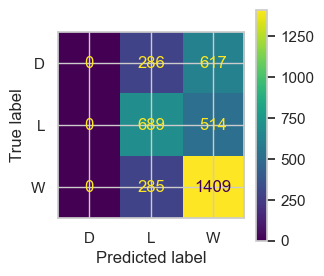

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

# Calculate Accuracy
print('Accuracy:', accuracy_score(actual, predicted))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))

# Create the matrix
cm = confusion_matrix(actual, predicted)
cmp = ConfusionMatrixDisplay(cm, display_labels=['D', 'L', 'W'])
cmp.plot(ax=ax)

plt.show()

In [26]:
df.drop('B365 Prediction', axis=1, inplace=True)

# 4. Feature Engineering

In [22]:
# Global variables for Feature Engineering
number_of_previous_matches = 10

In [23]:
df.head()

Date   HomeTeam    AwayTeam  FTHG  FTAG  HS  AS  HST  AST  HF  AF  \
0  2012-08-18    arsenal  sunderland     0     0  14   3    4    2  12   8   
1  2012-08-18     fulham     norwich     5     0  11   4    9    2  12  11   
2  2012-08-18  newcastle   tottenham     2     1   6  12    4    6  12   8   
3  2012-08-18        qpr     swansea     0     5  20  12   11    8  11  14   
4  2012-08-18    reading       stoke     1     1   9   6    3    3   9  14   

   HC  AC  HY  AY  HR  AR  B365H  B365D  B365A Result  HDays  ADays  
0   7   0   0   0   0   0   1.40   4.50   8.50      D     10     10  
1   6   3   0   0   0   0   1.80   3.60   4.50      W     10     10  
2   3   5   2   2   0   0   2.50   3.40   2.75      W     10     10  
3   5   3   2   2   0   0   2.00   3.40   3.80      L     10     10  
4   4   3   2   4   0   1   2.38   3.25   3.10      D     10     10

## 4.1 Home Team Form

### HASLxM- Average Shots by Home Team in the Last x Matches

In [24]:
def getShots(row, team):
    if row['HomeTeam'] == team:
        return row['HS']
    else:
        return row['AS']

In [25]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots'] = team_df.apply(lambda row: getShots(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots'].shift(i)
    
    team_df['HASLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [26]:
# df.head(10)

In [27]:
df.shape

(3800, 24)

### HASTLxM- Average Shots on Target by Home Team in the Last x Matches

In [28]:
def getShotsOnTarget(row, team):
    if row['HomeTeam'] == team:
        return row['HST']
    else:
        return row['AST']

In [29]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots on Target'] = team_df.apply(lambda row: getShotsOnTarget(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots on Target'].shift(i)
    
    team_df['HASTLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots on Target'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [30]:
# df.head(10)

In [31]:
df.shape

(3800, 25)

### HACL5M- Average Corners by Home Team in the Last x Matches

In [32]:
def getCorners(row, team):
    if row['HomeTeam'] == team:
        return row['HC']
    else:
        return row['AC']

In [33]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Corners'] = team_df.apply(lambda row: getCorners(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Corners'].shift(i)
    
    team_df['HACLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Corners'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [34]:
# df.head()

In [35]:
df.shape

(3800, 26)

### HAFLxM- Average Fouls by Home Team in the Last x Matches

In [36]:
def getFouls(row, team):
    if row['HomeTeam'] == team:
        return row['HF']
    else:
        return row['AF']

In [37]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Fouls'] = team_df.apply(lambda row: getFouls(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Fouls'].shift(i)
    
    team_df['HAFLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Fouls'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [38]:
# df.head()

In [39]:
df.shape

(3800, 27)

### HAYCLxM- Average Yellow Cards by Home Team in the Last x Matches

In [40]:
def getYellowCards(row, team):
    if row['HomeTeam'] == team:
        return row['HY']
    else:
        return row['AY']

In [41]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Yellow Cards'] = team_df.apply(lambda row: getYellowCards(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Yellow Cards'].shift(i)
    
    team_df['HAYCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Yellow Cards'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [42]:
# df.head()

In [43]:
df.shape

(3800, 28)

### HARCLxM- Average Red Cards by Home Team in the Last x Matches

In [44]:
def getRedCards(row, team):
    if row['HomeTeam'] == team:
        return row['HR']
    else:
        return row['AR']

In [45]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Red Cards'] = team_df.apply(lambda row: getRedCards(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Red Cards'].shift(i)
    
    team_df['HARCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Red Cards'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [46]:
# df.head()

In [47]:
df.shape

(3800, 29)

### HAGSLxM- Average Goals Scored by Home Team in the Last x Matches

In [48]:
def getGoalsScored(row, team):
    if row['HomeTeam'] == team:
        return row['FTHG']
    else:
        return row['FTAG']

In [49]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Goals Scored'] = team_df.apply(lambda row: getGoalsScored(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Goals Scored'].shift(i)
    
    team_df['HAGSLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Goals Scored'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [50]:
# df.head()

In [51]:
df.shape

(3800, 30)

### HAGCLxM- Average Goals Conceded by Home Team in the Last x Matches

In [52]:
def getGoalsConceded(row, team):
    if row['HomeTeam'] == team:
        return row['FTAG']
    else:
        return row['FTHG']

In [53]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Goals Conceded'] = team_df.apply(lambda row: getGoalsConceded(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Goals Conceded'].shift(i)
    
    team_df['HAGCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Goals Conceded'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [54]:
# df.head()

In [55]:
df.shape

(3800, 31)

### HAGSLxHM- Average Goals Scored by Home Team in the Last x Home Matches

In [56]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['FTHG'].shift(i)

    team_df['HAGSLxHM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [57]:
# df.head()

In [58]:
df.shape

(3800, 32)

### HAGCLxHM- Average Goals Conceded by Home Team in the Last x Home Matches

In [59]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['FTAG'].shift(i)

    team_df['HAGCLxHM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [60]:
# df.head()

In [61]:
df.shape

(3800, 33)

### HGDLxM- Goals Difference of Home Team in the Last x Matches

In [62]:
def getGoalsScoredByTeam(row, team):
    if row['HomeTeam'] == team:
        return row['FTHG']
    elif row['AwayTeam'] == team:
        return row['FTAG']

In [63]:
def getGoalsScoredByOpponent(row, team):
    if row['HomeTeam'] == team:
        return row['FTAG']
    elif row['AwayTeam'] == team:
        return row['FTHG']

In [64]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    column1 = 0;
    column2 = 0;
    
    team_df['GoalsScoredByTeam'] = team_df.apply(lambda row: getGoalsScoredByTeam(row, team), axis=1)
    team_df['GoalsScoredByOpponent'] = team_df.apply(lambda row: getGoalsScoredByOpponent(row, team), axis=1)
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['GoalsScoredByTeam'].shift(i)
        column2 += team_df['GoalsScoredByOpponent'].shift(i)
    
    team_df['HGDLxM'] = column1 - column2
    team_df.drop(columns=['GoalsScoredByTeam', 'GoalsScoredByOpponent'], inplace=True)
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [65]:
# df.head(10)

In [66]:
df.shape

(3800, 34)

### HGDLxHM- Goals Difference of Home Team in the Last x Home Matches

In [67]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[df['HomeTeam'] == team]
    column1 = 0;
    column2 = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['FTHG'].shift(i)
        column2 += team_df['FTAG'].shift(i)

    team_df['HGDLxHM'] = column1 - column2
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [68]:
# df.head(10)

In [69]:
df.shape

(3800, 35)

### HAPLxM- Average Points Gained by Home Team in the Last x Matches

In [70]:
def getPointsGained(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 3
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 0
    else:
        if row['Result'] == 'W':
            return 0
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 3

In [71]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['HAPLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [72]:
# df.head(10)

In [73]:
df.shape

(3800, 36)

### HAPLxHM- Average Points Gained by Home Team in the Last x Home Matches

In [74]:
def getPointsGained(row):
    if row['Result'] == 'W':
        return 3
    elif row['Result'] == 'D':
        return 1
    elif row['Result'] == 'L':
        return 0

In [75]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team)]
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
    column = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['HAPLxHM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be s

C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\2143511358.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [76]:
# df.head()

In [77]:
df.shape

(3800, 37)

### HWPLxM- Win Percentage of Home Team in the Last x Matches

In [78]:
def getNumberOfWins(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L':
            return 1
        else:
            return 0

In [79]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Wins'].shift(i)
    
    team_df['HWPLxM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Wins'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [80]:
# df.head()

In [81]:
df.shape

(3800, 38)

### HWPLxHM- Win Percentage of Home Team in the Last x Home Matches

In [82]:
def getNumberOfWinsAtHome(row):
    if row['Result'] == 'W':
        return 1
    else:
        return 0

In [83]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team)]
    team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
    column = 0
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Wins'].shift(i)
    
    team_df['HWPLxHM'] = column / number_of_previous_matches
    team_df.drop(columns=['Number of Wins'], inplace=True)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1280583981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1280583981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1280583981.py:5: SettingWithCopyWarning: 
A value is 

C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1280583981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1280583981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWinsAtHome(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1280583981.py:5: SettingWithCopyWarning: 
A value is 

In [84]:
# df.head()

In [85]:
df.shape

(3800, 39)

### HWinStreak- Home Team Win Streak

In [86]:
def getBooleanWin(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L':
            return 1
        else:
            return 0

In [87]:
temp_df = pd.DataFrame()

for team in df['HomeTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Win'] = team_df.apply(lambda row: getBooleanWin(row, team), axis=1)
    
    grouper = (team_df['Win'] != team_df['Win'].shift()).cumsum()
    team_df['HWinStreak'] = team_df['Win'].groupby(grouper).cumsum()
    team_df.drop(columns=['Win'], inplace=True)
    team_df['HWinStreak'] = team_df['HWinStreak'].shift(1)
    
    team_df = team_df[team_df['HomeTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [88]:
# df.tail()

In [89]:
df.shape

(3800, 40)

## 4.2 Away Team Form

### AASLxM- Average Shots of Away Team in Last x Matches

In [90]:
def getShots(row, team):
    if row['AwayTeam'] == team:
        return row['AS']
    else:
        return row['HS']

In [91]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots'] = team_df.apply(lambda row: getShots(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots'].shift(i)
    
    team_df['AASLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [92]:
# df.head(10)

In [93]:
df.shape

(3800, 41)

### AASTLxM- Average Shots on Target of Away Team in Last x Matches

In [94]:
def getShotsOnTarget(row, team):
    if row['AwayTeam'] == team:
        return row['AST']
    else:
        return row['HST']

In [95]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Shots on Target'] = team_df.apply(lambda row: getShotsOnTarget(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Shots on Target'].shift(i)
    
    team_df['AASTLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Shots on Target'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [96]:
# df.head(10)

In [97]:
df.shape

(3800, 42)

### AACLxM- Average Corners by Away Team in the Last x Matches

In [98]:
def getCorners(row, team):
    if row['AwayTeam'] == team:
        return row['AC']
    else:
        return row['HC']

In [99]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Corners'] = team_df.apply(lambda row: getCorners(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Corners'].shift(i)
    
    team_df['AACLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Corners'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [100]:
# df.head(10)

In [101]:
df.shape

(3800, 43)

### AAFLxM- Average Fouls by Away Team in the Last x Matches

In [102]:
def getFouls(row, team):
    if row['AwayTeam'] == team:
        return row['AF']
    else:
        return row['HF']

In [103]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Fouls'] = team_df.apply(lambda row: getFouls(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Fouls'].shift(i)
    
    team_df['AAFLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Fouls'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [104]:
# df.head(10)

In [105]:
df.shape

(3800, 44)

### AAYCLxM- Average Yellow Cards by Away Team in the Last x Matches

In [106]:
def getYellowCards(row, team):
    if row['AwayTeam'] == team:
        return row['AY']
    else:
        return row['HY']

In [107]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Yellow Cards'] = team_df.apply(lambda row: getYellowCards(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Yellow Cards'].shift(i)
    
    team_df['AAYCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Yellow Cards'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [108]:
# df.head(10)

In [109]:
df.shape

(3800, 45)

### AARCLxM- Average Red Cards by Away Team in the Last x Matches

In [110]:
def getRedCards(row, team):
    if row['AwayTeam'] == team:
        return row['AR']
    else:
        return row['HR']

In [111]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Red Cards'] = team_df.apply(lambda row: getRedCards(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Red Cards'].shift(i)
    
    team_df['AARCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Red Cards'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [112]:
# df.head(10)

In [113]:
df.shape

(3800, 46)

### AAGSLxM- Average Goals Scored by Away Team in the Last x Matches

In [114]:
def getGoalsScored(row, team):
    if row['AwayTeam'] == team:
        return row['FTAG']
    else:
        return row['FTHG']

In [115]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Goals Scored'] = team_df.apply(lambda row: getGoalsScored(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Goals Scored'].shift(i)
    
    team_df['AAGSLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Goals Scored'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [116]:
# df.head(10)

In [117]:
df.shape

(3800, 47)

### AAGCLxM- Average Goals Conceded by Away Team in the Last x Matches

In [118]:
def getGoalsConceded(row, team):
    if row['AwayTeam'] == team:
        return row['FTHG']
    else:
        return row['FTAG']

In [119]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Total Goals Conceded'] = team_df.apply(lambda row: getGoalsConceded(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Total Goals Conceded'].shift(i)
    
    team_df['AAGCLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Total Goals Conceded'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [120]:
# df.head(10)

In [121]:
df.shape

(3800, 48)

### AAGSLxAM- Average Goals Scored by Away Team in the Last x Away Matches

In [122]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['FTAG'].shift(i)

    team_df['AAGSLxAM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [123]:
# df.head()

In [124]:
df.shape

(3800, 49)

### AAGCLxAM- Average Goals Conceded by Away Team in the Last x Away Matches

In [125]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    column = 0;
    
    team_df = team_df.sort_values(by = 'Date')
    for i in range(1, number_of_previous_matches+1):
        column += team_df['FTHG'].shift(i)

    team_df['AAGCLxAM'] = column / number_of_previous_matches
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [126]:
# df.head()

In [127]:
df.shape

(3800, 50)

### AGDLxM- Goals Difference of Away Team in the Last x Matches  

In [128]:
def getGoalsScoredByTeam(row, team):
    if row['HomeTeam'] == team:
        return row['FTHG']
    elif row['AwayTeam'] == team:
        return row['FTAG']

In [129]:
def getGoalsScoredByOpponent(row, team):
    if row['HomeTeam'] == team:
        return row['FTAG']
    elif row['AwayTeam'] == team:
        return row['FTHG']

In [130]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    column1 = 0;
    column2 = 0;
    
    team_df['GoalsScoredByTeam'] = team_df.apply(lambda row: getGoalsScoredByTeam(row, team), axis=1)
    team_df['GoalsScoredByOpponent'] = team_df.apply(lambda row: getGoalsScoredByOpponent(row, team), axis=1)
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['GoalsScoredByTeam'].shift(i)
        column2 += team_df['GoalsScoredByOpponent'].shift(i)
    
    team_df['AGDLxM'] = column1 - column2
    team_df.drop(columns=['GoalsScoredByTeam', 'GoalsScoredByOpponent'], inplace=True)
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [131]:
# df.head(10)

### AGDLxAM- Goals Difference of Away Team in the Last x Away Matches

In [132]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[df['AwayTeam'] == team]
    team_df = team_df.sort_values(by = 'Date')

    column1 = 0;
    column2 = 0
    
    for i in range(1, number_of_previous_matches+1):
        column1 += team_df['FTHG'].shift(i)
        column2 += team_df['FTAG'].shift(i)

    team_df['AGDLxAM'] = column2 - column1
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [133]:
# df.head(10)

In [134]:
df.shape

(3800, 52)

### AAPLxM- Average Points Gained by Away Team in the Last x Matches

In [135]:
def getPointsGained(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 3
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 0
    else:
        if row['Result'] == 'W':
            return 0
        elif row['Result'] == 'D':
            return 1
        elif row['Result'] == 'L':
            return 3

In [136]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['AAPLxM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [137]:
# df.head(10)

In [138]:
df.shape

(3800, 53)

### AAPLxAM- Average Points Gained by Away Team in the Last x Away Matches

In [139]:
def getPointsGained(row):
    if row['Result'] == 'W':
        return 0
    elif row['Result'] == 'D':
        return 1
    elif row['Result'] == 'L':
        return 3

In [140]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['AwayTeam'] == team)]
    team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
    team_df = team_df.sort_values(by = 'Date')
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Points Gained'].shift(i)
    
    team_df['AAPLxAM'] = column / number_of_previous_matches
    team_df.drop(columns=['Points Gained'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be s

C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Points Gained'] = team_df.apply(lambda row: getPointsGained(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\1479794792.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [141]:
# df.head()

In [142]:
df.shape

(3800, 54)

### AWPLxM- Win Percentage of Away Team in the Last x Matches

In [143]:
def getNumberOfWins(row, team):
    if row['HomeTeam'] == team:
        if row['Result'] == 'W':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'L':
            return 1
        else:
            return 0

In [144]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row, team), axis=1)
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Wins'].shift(i)
    
    team_df['AWPLxM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Wins'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [145]:
# df.head()

In [146]:
df.shape

(3800, 55)

### AWPLxAM- Win Percentage of Away Team in the Last x Away Matches

In [147]:
def getNumberOfWins(row):
    if row['Result'] == 'L':
        return 1
    else:
        return 0

In [148]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['AwayTeam'] == team)]
    team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
    team_df = team_df.sort_values(by = 'Date')
    column = 0
    
    for i in range(1, number_of_previous_matches+1):
        column += team_df['Number of Wins'].shift(i)
    
    team_df['AWPLxAM'] = (column / number_of_previous_matches)*100
    team_df.drop(columns=['Number of Wins'], inplace=True)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be se

C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['Number of Wins'] = team_df.apply(lambda row: getNumberOfWins(row), axis=1)
C:\Users\choibs\AppData\Local\Temp\ipykernel_13564\625126065.py:5: SettingWithCopyWarning: 
A value is trying to be se

In [149]:
# df.head()

In [150]:
df.shape

(3800, 56)

### AWinStreak- Away Team Win streak

In [151]:
def getBooleanWin(row, team):
    if row['AwayTeam'] == team:
        if row['Result'] == 'L':
            return 1
        else:
            return 0
    else:
        if row['Result'] == 'W':
            return 1
        else:
            return 0

In [152]:
temp_df = pd.DataFrame()

for team in df['AwayTeam'].unique():
    team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)]
    team_df = team_df.sort_values(by = 'Date')
    
    team_df['Win'] = team_df.apply(lambda row: getBooleanWin(row, team), axis=1)
    
    grouper = (team_df['Win'] != team_df['Win'].shift()).cumsum()
    team_df['AWinStreak'] = team_df['Win'].groupby(grouper).cumsum()
    team_df.drop(columns=['Win'], inplace=True)
    team_df['AWinStreak'] = team_df['AWinStreak'].shift(1)
    
    team_df = team_df[team_df['AwayTeam'] == team]
    temp_df = pd.concat([temp_df, team_df]).reset_index(drop=True)

df = temp_df

In [153]:
# df.tail()

In [154]:
df.shape

(3800, 57)

## 4.3 Home Team Rating

### HDef- Home Team Defense Rating
### HMid- Home Team Midfield Rating
### HAtt- Home Team Attack Rating
### HOvr- Home Team Overall Rating

In [156]:
fifa_ratings_df = pd.read_csv('datasets/data-source-3/dataset3.csv')
fifa_ratings_df.head()

Version        Date       Team  Attack  Midfield  Defense
0  FIFA 22  2022-08-18  liverpool      86        84       85
1  FIFA 22  2022-08-18       city      84        87       86
2  FIFA 22  2022-08-18    chelsea      84        85       83
3  FIFA 22  2022-08-18     united      82        83       81
4  FIFA 22  2022-08-18  tottenham      83        81       78

In [157]:
def getHomeTeamRatingIndex(row):
    date = row['Date']
    hometeam = row['HomeTeam']
    
    ratings_df = fifa_ratings_df[(fifa_ratings_df['Team'] == hometeam) & (fifa_ratings_df['Date'] < date)]
    ratings_row = ratings_df.sort_values(by = ['Date', 'Version'], ascending=[False, False]).iloc[0, :]
    
    row['HDef'] = ratings_row['Defense']
    row['HMid'] = ratings_row['Midfield']
    row['HAtt'] = ratings_row['Attack']
    row['HOvr'] = round((row['HDef'] + row['HMid'] + row['HAtt'])/3, 2)
    return row

In [158]:
df = df.apply(getHomeTeamRatingIndex, axis=1)

In [159]:
# df.head()

In [160]:
df.shape

(3800, 61)

## 4.4 Away Team Rating

### ADef- Away Team Defense Rating
### AMid- Away Team Midfield Rating
### AAtt- Away Team Attack Rating
### AOvr- Away Team Overall Rating

In [161]:
def getAwayTeamRatingIndex(row):
    date = row['Date']
    awayteam = row['AwayTeam']
    
    ratings_df = fifa_ratings_df[(fifa_ratings_df['Team'] == awayteam) & (fifa_ratings_df['Date'] < date)]
    ratings_row = ratings_df.sort_values(by = ['Date', 'Version'], ascending=[False, False]).iloc[0, :]
    
    row['ADef'] = ratings_row['Defense']
    row['AMid'] = ratings_row['Midfield']
    row['AAtt'] = ratings_row['Attack']
    row['AOvr'] = round((row['ADef'] + row['AMid'] + row['AAtt'])/3, 2)
    
    return row

In [162]:
df = df.apply(getAwayTeamRatingIndex, axis=1)

In [163]:
# df.head()

In [164]:
df.shape

(3800, 65)

## 5. Save to CSV

In [165]:
df.to_csv(f'datasets/cleaned_dataset.csv', index=False)